Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


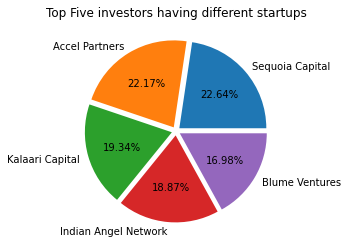

In [13]:
# problem 3:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_data=pd.read_csv("startup_funding.csv",encoding="utf-8")
df=file_data.copy()

# removing all sorts of undisclosed investors present in data
df=df[df.InvestorsName!="Undisclosed Investors"]
df=df[df.InvestorsName!="Undisclosed investors"]
df=df[df.InvestorsName!="Undisclosed Investor"]
df=df[df.InvestorsName!="Undisclosed investor"]
df=df[df.InvestorsName!="undisclosed investors"]
df=df[df.InvestorsName!="Undisclosed"]
df.dropna(subset=["InvestorsName"],inplace=True)
def func1(name):
    return name.split(",")
# considering all investors for a particular startup
df.InvestorsName=df.InvestorsName.apply(func1) 

# correcting the spelling of StartupNames in respective columns
df.StartupName.replace("Ola Cabs","Ola",inplace=True)
df.StartupName.replace("Olacabs","Ola",inplace=True)
df.StartupName.replace("olacabs","Ola",inplace=True)
df.StartupName.replace("ola","Ola",inplace=True)
df.StartupName.replace("Flipkart.com","Flipkart",inplace=True)
df.StartupName.replace("Oyorooms","Oyo",inplace=True)
df.StartupName.replace("OYO Rooms","Oyo",inplace=True)
df.StartupName.replace("OyoRooms","Oyo",inplace=True)
df.StartupName.replace("Oyo Rooms","Oyo",inplace=True)
df.StartupName.replace("Paytm Marketplace","Paytm",inplace=True)

inv=np.array(df.InvestorsName)
stname=np.array(df.StartupName)
check={}
i_a={}

for i in range(len(inv)):
    for j in range(len(inv[i])):
        element=inv[i][j].strip()
        if element!="":
            if not((stname[i]+element) in check.keys()):
                i_a[element]=i_a.get(element,0)+1
                check[stname[i]+element]=1
                
d=pd.DataFrame(list(i_a.values()),list(i_a.keys()))
d=d.sort_values(by=[0],ascending=False)
for i in range(5):
    print(d.index[i],d[0][i])

# plotting pie graph of data obtained from above

count=np.array(d.values[0:5]).ravel()
inv_names=np.array(d.index[0:5]).ravel()
e=[0.05,0.05,0.05,0.05,0.05]
plt.pie(count,labels=inv_names,autopct="%.2f%%",explode=e)
plt.title("Top Five investors having different startups")
plt.show()